# Import data

The import code in this section is specific to the CSV automatically generated for each collective dialouge on remesh. To use data from other sources, import code will need written which transforms the data into the following format:


*   A list named *qs* where each list entry is a dataframe with data for a quesiton/prompt
*   Each data frame for a quesiton/prompt is formatted such that rows correspond to *responses* and there are the following columns: *Question*, *Question Type*, *Responses* , *Segment 1* , *Segment 2*, ... , *Segmnet N*
*   The values in the columns for each segment are the fraction of participants in that segment which agree with the response in that row.

It is also helpful to have the code output the list of questions and segments and their IDs so they can be referenced by ID for use in later sections of this notebook.



In [1]:
from google.colab import files
import pandas as pd
import csv
import io
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data from file
pd.set_option('display.max_colwidth', 0)
uploaded = files.upload()
filename = next(iter(uploaded))
with open(filename,'r') as file:
  csvreader = csv.reader(file)
  r = 1
  data = []
  qdata = []
  for row in csvreader:
    if r>9:
      if row == []:
        data.append(qdata)
        qdata = []
      else:
        qdata.append(row)
    r=r+1
  data.append(qdata)

#handle blank row
data = data[1:]

#percent string to float
def p2f(x):
  try:
    if x==' - ':
      return float("nan")
    else:
      return float(x.strip('%'))/100
  except:
    return x

#make numeric
nq = len(data)
qs = []
meta = [["question type","question text"]]
for i in range(0,nq):
  d = data[i]
  m = [d[1][1],d[1][2]]
  meta.append(m)
  if d[1][1] == 'Poll Single Select':
    for r in range(1,len(d)):
      for c in range(4,len(d[0])):
        d[r][c] = p2f(d[r][c])
  if d[1][1] == 'Ask Opinion':
    for r in range(1,len(d)):
      for c in range(6,len(d[0])-3):
        d[r][c] = p2f(d[r][c])
  df = pd.DataFrame(d[1:],columns = d[0])
  qs.append(df)
qmeta = pd.DataFrame(meta[1:],columns = meta[0])

print("Questions:")
qmeta

Saving CD1_pretest_conflict.csv to CD1_pretest_conflict.csv
Questions:


,question type,question text
0,Poll Single Select,What is your age?
1,Poll Single Select,What is your ethnicity?
2,Poll Single Select,What gender do you identify with?
3,Poll Single Select,What political party do you most identify with?
4,Poll Single Select,What is your highest level of education?
5,Poll Single Select,How much have you heard or read about AI (Artificial Intelligence)?
6,Poll Single Select,"How often do you use an AI assistant such as ChatGPT, Claud, and Bard?"
7,Poll Single Select,"Overall, do you think the public has insights useful to guide how AI Assistants answer difficult questions?"
8,Poll Single Select,"Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…"
9,Poll Single Select,What religious group or faith do you most identify with?


In [4]:
#extract segments
d=data[0]
segments = []
if d[1][1] == 'Poll Single Select':
  r=0
  for c in range(4,len(d[0])):
    segments.append(d[r][c])
if d[1][1] == 'Ask Opinion':
  r=0
  for c in range(5,len(d[0])-3):
    segments.append(d[r][c])
print("Segments")
pd.DataFrame(segments)

Segments


,0
0,All(49)
1,O1: 18-24 (10)
2,O1: 25-34 (18)
3,O1: 33-44 (5)
4,O1: 45-54 (7)
5,O1: 55+ (9)
6,O2: Asian (6)
7,O2: Black (5)
8,O2: Hispanic (5)
9,O2: White (29)


# Visualize poll data

This section enables a simple visualization of poll data cut by segments.

In [5]:
import matplotlib.pyplot as plt
plt.close("all")

In [6]:
#plot poll data
def plot_poll(df,segs):
  print(df["Question"][1])
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[4+segs[i]])
  dfplt = df[segs_incl]
  dfplt = dfplt.set_index('Responses')
  dfplt.plot.barh()
  return dfplt

Overall, would you say the increased use of artificial intelligence (AI) in daily life makes you feel…


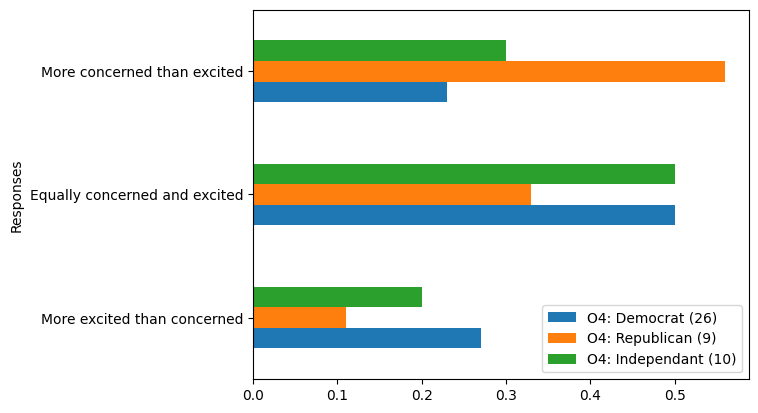

In [7]:
#choose question and segments
qid = 8
segs = [16,17,18]

#plot
d =plot_poll(qs[qid],segs)

#Visusalize collective response question data

Here we create a simple visualization of the results of a **collective response** question (aka "ask opinion" on Remesh) where users respond with natural language and then vote on the responses submitted by others. The visualization is generated for a selected *question* and *set of segments*. In the visualization each row corresponds to a response, columns correspond to the selected set of segments, and values correspond to the fraction of each segment which  agrees* with each response.

**this agreement fraction is computed on Remesh using [elicitation inference](https://openreview.net/pdf?id=tkxnRPkb_H). We sample around 10-30 votes per person, then infer the rest. Accuracy of individual vote inferences is 75-80%, and the aggregated agreement fraction values for each segment have a 1 stdv confidence range of around +/- 1-3%.*

In [8]:
#plot ask opinion data
def make_pretty(styler):
  styler.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")
  styler.format(precision=2)
  return styler

#generate the table of data
def table_ask(df,segs,n):
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[6+segs[i]])
  dfplt = df[segs_incl]
  #dfplt = dfplt.set_index('Responses')
  return dfplt.iloc[:n].style.pipe(make_pretty)



In [11]:
#example usage

#choose question and segments
qid = 15
segs = [0,12,13,16,17,18,48,49,50,51,52,53,54]

#plot
print(qs[qid]["Question"][1])
table_ask(qs[qid],segs,10)

What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? 
Use the same format as above: "If [situation] then [what AI should do]."


,Responses,All(45),O3: Male (20),O3: Female (23),O4: Democrat (23),O4: Republican (9),O4: Independant (9),Religious (23),Not religious (22),White (28),Not white (17),Under 34 (26),33-54 (11),55+ (8)
0,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.",0.78,0.70,0.83,0.83,0.78,0.67,0.87,0.68,0.79,0.76,0.85,0.55,0.88
1,"If there is a tricky question regarding wars and conflicts, then the AI should refuse to answer because of the nature of the request",0.78,0.70,0.83,0.83,0.89,0.67,0.83,0.73,0.71,0.88,0.77,0.82,0.75
2,If asked about which side it thinks should should win the war then the AI should state that it isn't one to choose sides.,0.73,0.70,0.74,0.78,0.56,0.89,0.65,0.82,0.64,0.88,0.77,0.55,0.88
3,If asked for routes or locations relevant to a war or conflict then the ai should refuse to involve itself.,0.71,0.65,0.74,0.83,0.44,0.78,0.70,0.73,0.64,0.82,0.69,0.82,0.63
4,"If the war is ongoing and is asked about who is winning, then the AI should make it clear that the conflict is ongoing and it is very difficult to determine the ""winner"" at the time",0.71,0.65,0.74,0.74,0.89,0.56,0.83,0.59,0.75,0.65,0.77,0.55,0.75
5,"if the conflict is currently ongoing, ai should only present the facts and not give an opinion based answer.",0.69,0.65,0.74,0.74,0.78,0.67,0.87,0.50,0.75,0.59,0.69,0.55,0.88
6,"If a question about who should win a war or conflict is asked, the AI should refuse to answer.",0.67,0.60,0.70,0.74,0.44,0.78,0.57,0.77,0.64,0.71,0.65,0.64,0.75
7,I think that the AI should provide a small amount of information and admit that the answers that the AI provides may not be truthful depending on the source.,0.64,0.60,0.70,0.61,0.78,0.67,0.70,0.59,0.68,0.59,0.62,0.64,0.75
8,"If the question is about a current conflict then the AI should offer information from different, identified and dated sources, including the from the conflicting parties. It should say that the information is clouded by both the interests of the parties and the fog of war.",0.62,0.55,0.70,0.61,0.78,0.67,0.70,0.55,0.71,0.47,0.73,0.36,0.63
9,If the situation is unclear the AI should give the information from both sides with no definitive answer,0.62,0.60,0.65,0.57,0.78,0.67,0.74,0.50,0.64,0.59,0.58,0.64,0.75


#Generate bridging and polarization metrics across a specified set of segments

Here we compute simple versions of both bridging and polarization metrics for each response.

**The bridging metric** is meant to capture the degree to which there is agreement for a response across ALL specified population segments; even those which typically disagree. To capture this we use the segment-level analouge of a Max-Min social wellfare function. If a_ij is the fraction of the j^th segment which agrees with i^th response, then we compute the bridging metric for that response as b_i = MIN(a_i1,a_i2,...,a_iN)

**The polarization metric** is meant to capture the degree to which there is polariation between specified segments about a response. To capture this we compute the difference in agreement fraction for the segments which most agree with the response and least agree with the response. ie p_i = MAX(a_i1,a_i2,...,a_iN) - MIN(a_i1,a_i2,...,a_iN)

*We note that both of these are simplistic metrics and that more sophisticated versions might be prefered. This is a potential vector of improvement for this prototype*

In [12]:
#compute min-based bridging metric
def min_bridge(row,segs_incl,col):
  b = 1
  for s in range(0,len(segs_incl)):
    b_ = row[segs_incl[s]]
    b = min(b,b_)
  return b

#compute max-min polarization metric
def polarization(row,segs_incl,col):
  mx = 0
  mn = 1
  for s in range(0,len(segs_incl)):
    b_ = row[segs_incl[s]]
    mx = max(mx,b_)
    mn = min(mn,b_)
  return mx-mn

#generate dataframe which includes bridging and polarization metrics
def bridging_ask(df,segs):
  segs_incl = ['Responses']
  for i in range(0,len(segs)):
    segs_incl.append(df.columns[6+segs[i]])
  dfplt = df[segs_incl]
  dfplt["bridge"] = df.apply (lambda row: min_bridge(row,segs_incl[1:],df.columns), axis=1)
  dfplt["polarization"] = df.apply (lambda row: polarization(row,segs_incl[1:],df.columns), axis=1)
  return dfplt.sort_values(by=["bridge"],ascending=False)

In [13]:
#example usage

#choose question and segments
qid = 15
segs = [0,12,13,16,17,18,48,49,50,51,52,53,54]

#get table
print(qs[qid]["Question"][1])
ba = bridging_ask(qs[qid],segs).iloc[:10]
ba.style.pipe(make_pretty)

What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? 
Use the same format as above: "If [situation] then [what AI should do]."


,Responses,All(45),O3: Male (20),O3: Female (23),O4: Democrat (23),O4: Republican (9),O4: Independant (9),Religious (23),Not religious (22),White (28),Not white (17),Under 34 (26),33-54 (11),55+ (8),bridge,polarization
1,"If there is a tricky question regarding wars and conflicts, then the AI should refuse to answer because of the nature of the request",0.78,0.70,0.83,0.83,0.89,0.67,0.83,0.73,0.71,0.88,0.77,0.82,0.75,0.67,0.22
7,I think that the AI should provide a small amount of information and admit that the answers that the AI provides may not be truthful depending on the source.,0.64,0.60,0.70,0.61,0.78,0.67,0.70,0.59,0.68,0.59,0.62,0.64,0.75,0.59,0.19
0,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.",0.78,0.70,0.83,0.83,0.78,0.67,0.87,0.68,0.79,0.76,0.85,0.55,0.88,0.55,0.33
2,If asked about which side it thinks should should win the war then the AI should state that it isn't one to choose sides.,0.73,0.70,0.74,0.78,0.56,0.89,0.65,0.82,0.64,0.88,0.77,0.55,0.88,0.55,0.34
4,"If the war is ongoing and is asked about who is winning, then the AI should make it clear that the conflict is ongoing and it is very difficult to determine the ""winner"" at the time",0.71,0.65,0.74,0.74,0.89,0.56,0.83,0.59,0.75,0.65,0.77,0.55,0.75,0.55,0.34
20,If someone is requesting specific troop locations then AI should say it is unable to provide that information.,0.56,0.55,0.57,0.57,0.56,0.67,0.57,0.55,0.54,0.59,0.50,0.64,0.63,0.50,0.17
5,"if the conflict is currently ongoing, ai should only present the facts and not give an opinion based answer.",0.69,0.65,0.74,0.74,0.78,0.67,0.87,0.50,0.75,0.59,0.69,0.55,0.88,0.50,0.38
9,If the situation is unclear the AI should give the information from both sides with no definitive answer,0.62,0.60,0.65,0.57,0.78,0.67,0.74,0.50,0.64,0.59,0.58,0.64,0.75,0.50,0.28
11,"If there is no true answer, then the AI should remind the user that they are only AI and can only provide so much on information or opinion. Tell the user to seek a more helpful resource if it seems urgent.",0.60,0.55,0.65,0.57,0.67,0.67,0.61,0.59,0.61,0.59,0.62,0.45,0.75,0.45,0.30
3,If asked for routes or locations relevant to a war or conflict then the ai should refuse to involve itself.,0.71,0.65,0.74,0.83,0.44,0.78,0.70,0.73,0.64,0.82,0.69,0.82,0.63,0.44,0.39


#Select bridging responses

Here we select a set of responses whose bridging agreement is above a specified threshold. For now, we select the threshold such that the number of responses above it is small enough to fit within 8k the context window of the GPT-4 version we have access to so they can be used in the next step.

To highlight what this selection of responses equates to, we plot all responses as a function of their **overall agreement** (x-axis) and **polarization** (y-axis) and highlight those above the specific bridging threshold. This highlights the fact that selecting the responses with the highest bridging agreement generally equates to selecting responses with high overall agreement and low polarization; where the degree of polarization permissible is lower for responses with lower overall agreement.

In [14]:
#plot agreement vs polairation and highlight bridging response over threshold
def plot_agreement_polarization_with_bridging(df,segs,thresh):
  bdf = bridging_ask(df,segs)
  bridge_true = bdf.loc[bdf['bridge']>thresh]
  bridge_false = bdf.loc[bdf['bridge']<=thresh]
  plt.figure(figsize=(7,7))
  plts=plt.scatter(bdf[bdf.columns[2]],bdf["polarization"],c=bdf["bridge"],cmap="RdYlGn",alpha=0.3,edgecolors='none',s=80, label='all')
  plt.legend(*plts.legend_elements(),bbox_to_anchor=(1.0, 1.0),loc="upper left", title="Bridging Agreement",frameon=False)
  plt.scatter(bridge_true[bridge_true.columns[2]],bridge_true["polarization"],edgecolors="black",s=90,facecolors='none', label='bridge>thresh')
  plt.xlabel("Overall Agreement")
  plt.ylabel("Polarization")

  return plt.show()

def get_bridging_responses(df,segs,thresh):
  bdf = bridging_ask(df,segs)
  return bdf.loc[bdf['bridge']>thresh]

What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? 
Use the same format as above: "If [situation] then [what AI should do]."


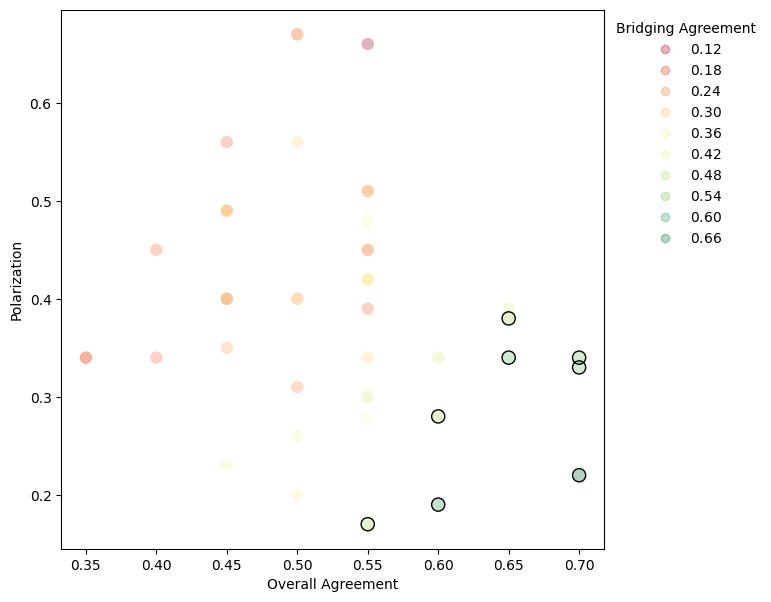

,Responses,All(45),O3: Male (20),O3: Female (23),O4: Democrat (23),O4: Republican (9),O4: Independant (9),Religious (23),Not religious (22),White (28),Not white (17),Under 34 (26),33-54 (11),55+ (8),bridge,polarization
1,"If there is a tricky question regarding wars and conflicts, then the AI should refuse to answer because of the nature of the request",0.78,0.70,0.83,0.83,0.89,0.67,0.83,0.73,0.71,0.88,0.77,0.82,0.75,0.67,0.22
7,I think that the AI should provide a small amount of information and admit that the answers that the AI provides may not be truthful depending on the source.,0.64,0.60,0.70,0.61,0.78,0.67,0.70,0.59,0.68,0.59,0.62,0.64,0.75,0.59,0.19
0,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.",0.78,0.70,0.83,0.83,0.78,0.67,0.87,0.68,0.79,0.76,0.85,0.55,0.88,0.55,0.33
2,If asked about which side it thinks should should win the war then the AI should state that it isn't one to choose sides.,0.73,0.70,0.74,0.78,0.56,0.89,0.65,0.82,0.64,0.88,0.77,0.55,0.88,0.55,0.34
4,"If the war is ongoing and is asked about who is winning, then the AI should make it clear that the conflict is ongoing and it is very difficult to determine the ""winner"" at the time",0.71,0.65,0.74,0.74,0.89,0.56,0.83,0.59,0.75,0.65,0.77,0.55,0.75,0.55,0.34
20,If someone is requesting specific troop locations then AI should say it is unable to provide that information.,0.56,0.55,0.57,0.57,0.56,0.67,0.57,0.55,0.54,0.59,0.50,0.64,0.63,0.50,0.17
5,"if the conflict is currently ongoing, ai should only present the facts and not give an opinion based answer.",0.69,0.65,0.74,0.74,0.78,0.67,0.87,0.50,0.75,0.59,0.69,0.55,0.88,0.50,0.38
9,If the situation is unclear the AI should give the information from both sides with no definitive answer,0.62,0.60,0.65,0.57,0.78,0.67,0.74,0.50,0.64,0.59,0.58,0.64,0.75,0.50,0.28


In [21]:
#example usage

#choose question and segments
qid = 15
segs = [0,12,13,16,17,18,48,49,50,51,52,53,54]
thresh = .45

print(qs[qid]["Question"][1])

#plot
plot_agreement_polarization_with_bridging(qs[qid],segs,thresh)

#table
ba = get_bridging_responses(qs[qid],segs,thresh)
ba.style.pipe(make_pretty)

# Distill unique ideas from bridging responses and generate policies based on those ideas

Here we use an LLM (GPT-4) to do two tasks:

1.   Generate a summary of the unique ideas found within the bridging responses.
2.   Genereate policies based on the unique ideas generated in step 1.


Here we note that the size of the context window of LLM we use limits the number of bridging responses which can be (easily) included in the summary tasks. Right now we use this limit to manually determine the briging agreement threshold we use in the previous section. If needed, it is likely possible to escape this limit by taking an iterative, hierarchical approch to summarization, ie by chunking briding responses into sets that fit in the context window limit, generating summaries for each chunk, then generating a summary of the summaries. This is vector for improvement of this prototype.

In [ ]:
!pip install langchain
!pip install openai
!pip install -U sentence-transformers
import os
os.environ["OPENAI_API_KEY"] = "your_api_key"

In [23]:
#build the lang chain to do summary -> policies

#from langchain.llms import ChatOpenAI
from langchain.chat_models import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.chains import SequentialChain

#load LLM
llm = ChatOpenAI(temperature=0.5,model_name='gpt-4-32k')

#summarization prompt
summaryPrompt = PromptTemplate(
    input_variables=["question","responses"],
    template="""
    Participants in a research study were asked '{question}'.

    These are their responses:
    {responses}

    Summarize all of the unique ideas within these responses into very short bullet points.
    """
)
#add to chain
summaryChain = LLMChain(llm=llm, prompt=summaryPrompt,output_key="summary")

#policy prompt
policyPrompt = PromptTemplate(
    input_variables=["question","summary","responses"],
    template="""
    Participants in a research study were asked '{question}'.

    These are their responses:
    {responses}

    The main ideas from these responses are:
    {summary}

    A policy is a course or principle of action.

    Write a few clear and actionable policies in the form of bullet points based on these ideas. Avoid redundant policies.

    for example:

    - Maintain the highest epistemic standards: Ensure your information is accurate, well-sourced, and contextually appropriate. This will help build a foundation of trust and credibility.
    - Facilitate productive engagement: Strive to assist the user in understanding and engaging with political topics in a meaningful way, rather than persuading them towards a particular viewpoint.

    """
)
#add to chain
policyChain = LLMChain(llm=llm, prompt=policyPrompt,output_key="policies")

#build the chain
mainChain = SequentialChain(
    chains=[summaryChain, policyChain],
    input_variables=["question", "responses"],
    # Here we return multiple variables
    output_variables=["summary","policies"],
    verbose=False)

#function to run the whole pipeline
def gen_policies(qs,qid,segs,thresh):
  #build string of responses
  ba = get_bridging_responses(qs[qid],segs,thresh)
  responses_str = ''
  for ind in ba.index:
    rsp = ba["Responses"][ind]
    responses_str+=rsp
    responses_str+="\n "

  #get quesiton text
  df = qs[qid]
  question_str = df["Question"][1]

  #run the langchain on the data
  out = mainChain({
      "question":question_str,
      "responses":responses_str
  })
  return out

In [ ]:
#example usage

#choose question and segments
qid = 15
segs = [0,12,13,16,17,18,42,43,44,45,46,47]
thresh = .55

#show question
print(qs[qid]["Question"][1])

#generate policies
out = gen_policies(qs,qid,segs,thresh)

#show results
print("Summary:")
print(out["summary"])
print("\n Policies:")
print(out["policies"])

# Estimate how well each policy is justified by the bridging responses

Here we aim to estimate the degree to which the bridging responses serve as evidece to support each policy. Our simple approach to this is to identify the bridging response which best supports each policy, then use how well that response supports the policy as a proxy for the overall strenght of evidence.

As a proxy for how well each response justifies each policy we use *semantic similarity*; ie. the cosine similarity between their corresponding embeddings. We note that a better way to quantify this might be to compute the degree of *entailment* between them, and we suspect GPT-4 may be used to compute entailment. This reprsents a potential vector of improvement for this prototype.


In [24]:
#get embeddings for policies and bridging_responses
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")

In [25]:
# find most entailing response and estimate the degree of entailment
import json

#load LLM
llm2 = ChatOpenAI(temperature=0.3,model_name='gpt-4-32k')

#summarization prompt
chooseEntailedResponsePrompt = PromptTemplate(
    input_variables=["policy","question","responses"],
    template="""
    I am going to share with you one policy and a set of responses to a question that may or may not entail that policy. Your job is to select the response that best entails the policy.

    '''
    Policy: {policy}

    Question: {question}

    Responses:
    {responses}
    '''

    Reply in json with the statement that best entails the policy.

    Format the response as:
    {{response:<response>, ID: <ID>}}
    """
)
#add to chain
chooseEntailedResponseChain = LLMChain(llm=llm, prompt=chooseEntailedResponsePrompt,output_key="best_response")

#policy prompt
entailmentPrompt = PromptTemplate(
    input_variables=["policy","question","best_response"],
    template="""
    Your job is to determine the degeree to which a response to a question entails or supports a given policy.

    '''
    Policy: {policy}

    Question: {question}

    Response: {best_response}
    '''

    Reply with one of the following numbers characterizing the degree of entailment:

    5 - perfect entailment. the response to the question directly implies the policy.
    4 - good entailment. the response to the question somehwat implies the policy.
    3 - neutral entailment. the response to the question does not imply the policy.
    2 - partially negative entailment. the response to the question partially contradicts the policy.
    1 - negative entailment. the response to the question directly contradicts the policy.

    Example replies:
    {{entailment:5, explination:<explination>}}
    {{entailment:4, explination:<explination>}}
    {{entailment:3, explination:<explination>}}
    {{entailment:2, explination:<explination>}}
    {{entailment:1, explination:<explination>}}

    """
)
#add to chain
entailmentChain = LLMChain(llm=llm2, prompt=entailmentPrompt,output_key="entailment")

#build the chain
mainEntailChain = SequentialChain(
    chains=[chooseEntailedResponseChain, entailmentChain],
    input_variables=["policy","question","responses"],
    # Here we return multiple variables
    output_variables=["best_response","entailment"],
    verbose=False)

#function to get most entailed response
def get_most_entailed_response(policy,question,responses):
  #run the langchain on the data
  out = mainEntailChain({
        "policy":policy,
        "question":question,
        "responses":responses
    })

  best_response = json.loads(out["best_response"])["response"]
  best_response_ID = int(json.loads(out["best_response"])["ID"])
  best_response_entailment = int(json.loads(out["entailment"])["entailment"])/5
  return {"response":best_response,"ID":best_response_ID,"entailment":best_response_entailment}


In [26]:
#function to run full pipeline to generate policies with evidence e2e using entailment (NEW WAY, but slower)

import numpy as np

def get_policies_with_entailed_evidence(qs,qid,segs,thresh):
  #policy generation based on bridging responses
  out = gen_policies(qs,qid,segs,thresh)

  #output summary and policies
  print("")
  print("Summary:")
  print(out["summary"])
  print("")
  print("Policies:")
  print(out["policies"])
  print("")

  #extract policies
  policies = list(map(lambda x: x[2:],out["policies"].splitlines()))

  #extract bridging responses
  import math
  bridging_responses = []
  bridging_responses_with_bridging_support = []
  bridging_support = []
  ba = get_bridging_responses(qs[qid],segs,thresh)
  responses_str = ''
  for ind in ba.index:
    rsp = ba["Responses"][ind]
    responses_str += "["+str(ind)+"] "+ rsp + "\n"

  #get quesiton text
  df = qs[qid]
  question_str = df["Question"][1]

  #initialize evidence lists
  supporting_responses = []
  evidence_strengths = []
  bridging_strengths = []
  justifications = []
  questions = []
  #build evidence and justification info
  for i in range(0,len(policies)):
    policy = policies[i]
    #get most entailed respone
    entailed_response_data = get_most_entailed_response(policy,question_str,responses_str)
    #extract and use most entailed response info
    supporting_responses.append(entailed_response_data["response"])
    rid = entailed_response_data["ID"]
    evidence_strengths.append(entailed_response_data["entailment"])
    bridging_strengths.append(ba["bridge"][rid])
    justifications.append(ba["bridge"][rid]*entailed_response_data["entailment"])
    questions.append(question_str)

  #create data frame with policies and suppporting responses
  pd.set_option('display.max_colwidth', 0)
  psrdf = pd.DataFrame()
  psrdf["Policy"] = policies
  psrdf["Justification"] = justifications
  psrdf["Evidence Response"] = supporting_responses
  psrdf["Question"] = questions
  psrdf["Evidence strength"] = evidence_strengths
  psrdf["Evidence bridging support"] = bridging_strengths
  psrdf=psrdf.sort_values(by=["Justification"],ascending=False)
  psrdf_formated = psrdf.style.set_properties(**{'text-align': 'left'})
  psrdf_formated = psrdf_formated.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
  psrdf_formated.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")

  return psrdf_formated

In [ ]:
#function to run full pipeline to generate policies with evidence e2e using semantic similarity (OLD WAY, but faster)

import numpy as np

#function to get embeddings
def get_embedding(text_list,model):
  embeddings = [model.encode(text) for text in text_list]
  return np.squeeze(embeddings)

def get_policies_with_evidence(qs,qid,segs,thresh,show_sim_matrix=False):
  #policy generation based on bridging responses
  out = gen_policies(qs,qid,segs,thresh)

  #output summary and policies
  print("")
  print("Summary:")
  print(out["summary"])
  print("")
  print("Policies:")
  print(out["policies"])
  print("")

  #extract policies
  policies = list(map(lambda x: x[2:],out["policies"].splitlines()))

  #extract bridging responses
  import math
  bridging_responses = []
  bridging_responses_with_bridging_support = []
  bridging_support = []
  ba = get_bridging_responses(qs[qid],segs,thresh)
  responses_str = ''
  for ind in ba.index:
    rsp = ba["Responses"][ind]
    bridging_responses.append(rsp)
    bridging_support.append(ba["bridge"][ind])
    rsp += " [bridging support="
    b = math.floor(ba["bridge"][ind]*100)
    rsp +=str(b)
    rsp +="%]"
    bridging_responses_with_bridging_support.append(rsp)

  #get embeddings for policies and bridging responses
  ep = get_embedding(policies,model)
  er = get_embedding(bridging_responses,model)

  #compute similarity matrix between policies and responses
  sim = cosine_similarity(ep,er)

  if show_sim_matrix:
    #visualize simialrlity matrix between policies and bridging responses
    fig, ax = plt.subplots()
    im = ax.imshow(sim,cmap="RdYlGn")
    xt = ax.set_xticks(np.arange(len(bridging_responses)), labels=bridging_responses,fontsize=8)
    yt = ax.set_yticks(np.arange(len(policies)), labels=policies,fontsize=8)
    cbar = ax.figure.colorbar(im, ax=ax)
    ax.tick_params(top=True, bottom=False,labeltop=True, labelbottom=False)
    cbar.ax.set_ylabel("CosSim", rotation=-90, va="bottom")
    fig.tight_layout()
    plt.setp(ax.get_xticklabels(), rotation=-60, ha="right",rotation_mode="anchor")
    plt.show()

  #compute best supporting response for each policy
  supporting_response_index = [sim[j].argmax() for j in range(0,len(policies))]
  supporting_responses = [bridging_responses[supporting_response_index[j]] for j in range(0,len(policies))]
  evidence_strength = [sim[j].max() for j in range(0,len(policies))]
  supporting_response_bridging = [bridging_support[supporting_response_index[j]] for j in range(0,len(policies))]
  justification = [sim[j].max()*bridging_support[supporting_response_index[j]] for j in range(0,len(policies))]

  #create data frame with policies and suppporting responses
  pd.set_option('display.max_colwidth', 0)
  psrdf = pd.DataFrame()
  psrdf["Policy"] = policies
  psrdf["Justification"] = justification
  psrdf["Evidence strength"] = evidence_strength
  psrdf["Evidence bridging support"] =  supporting_response_bridging
  psrdf["Evidence Response"] = supporting_responses
  psrdf=psrdf.sort_values(by=["Justification"],ascending=False)
  psrdf_formated = psrdf.style.set_properties(**{'text-align': 'left'})
  psrdf_formated = psrdf_formated.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
  psrdf_formated.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")

  return psrdf_formated

# Generate policies with evidence for different collective response questions

What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? 
Use the same format as above: "If [situation] then [what AI should do]."


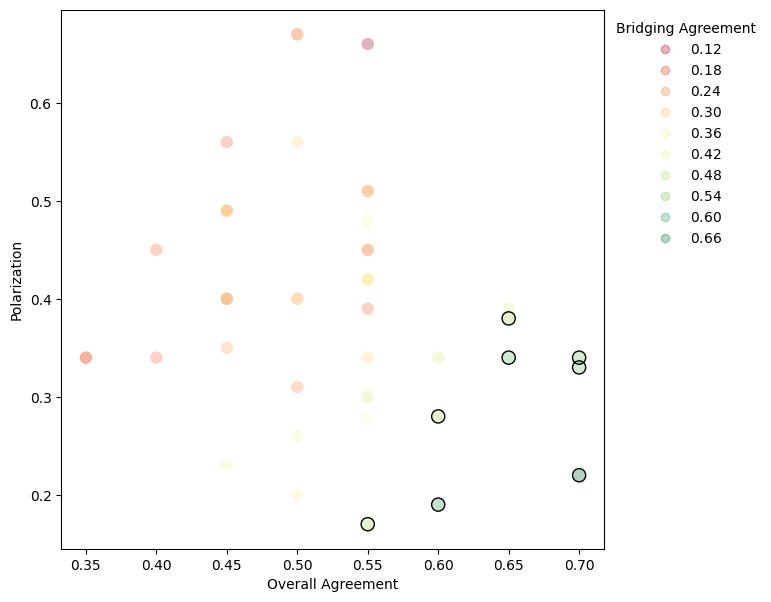


Summary:
- AI should refrain from answering tricky questions about wars and conflicts.
- AI should provide limited information and acknowledge potential inaccuracies.
- AI should not advise on personal action or side to support in a conflict.
- AI should not express a preference for a particular side in a war.
- AI should clarify that it's difficult to determine a "winner" in an ongoing conflict.
- AI should not provide specific troop locations.
- AI should present factual information without opinion on ongoing conflicts.
- If the situation is unclear, AI should provide information from both sides without a definitive answer.

Policies:
- Avoid taking sides: AI should not express preference or support for any side in a war or conflict.
- Refrain from speculative responses: AI should not predict outcomes or "winners" in ongoing conflicts.
- Prioritize factual information: AI should provide accurate, well-sourced information, and acknowledge if there are potential inaccuracies or biases

,Policy,Justification,Evidence Response,Question,Evidence strength,Evidence bridging support
0,Avoid taking sides: AI should not express preference or support for any side in a war or conflict.,0.550000,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
1,"Refrain from speculative responses: AI should not predict outcomes or ""winners"" in ongoing conflicts.",0.550000,"If the war is ongoing and is asked about who is winning, then the AI should make it clear that the conflict is ongoing and it is very difficult to determine the ""winner"" at the time","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
4,"Encourage independent decision-making: AI should provide resources and information to users, but refrain from advising on personal actions or positions to take in a conflict.",0.550000,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
6,Maintain neutrality in contentious issues: AI should handle tricky questions about wars and conflicts by either providing non-partisan information or tactfully refraining from answering.,0.550000,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
2,"Prioritize factual information: AI should provide accurate, well-sourced information, and acknowledge if there are potential inaccuracies or biases in the sources.",0.500000,"if the conflict is currently ongoing, ai should only present the facts and not give an opinion based answer.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.500000
3,Limit sensitive information: AI should not provide specific details such as troop locations that could pose security risks.,0.500000,If someone is requesting specific troop locations then AI should say it is unable to provide that information.,"What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.500000
5,"Present balanced viewpoints: If a situation is unclear, AI should provide information from all relevant perspectives without giving a definitive answer.",0.500000,If the situation is unclear the AI should give the information from both sides with no definitive answer,"What is one specific policy you think an AI assistant should 

In [27]:
#choose question and segments
qid = 15
segs = [0,12,13,16,17,18,48,49,50,51,52,53,54]
thresh = .45

#show question
print(qs[qid]["Question"][1])

#plot
plot_agreement_polarization_with_bridging(qs[qid],segs,thresh)

#generate summary and policies with evidence
policies_with_evidence = get_policies_with_entailed_evidence(qs,qid,segs,thresh)

#show policies with evidence
policies_with_evidence

What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? 
Use the same format as above: "If [situation] then [what AI should do]."


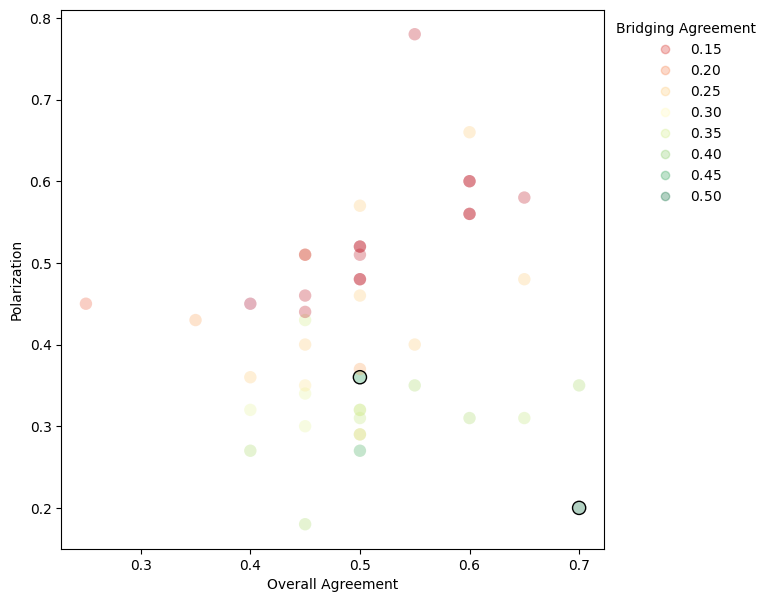


Summary:
- AI should inquire about the standard of "reliable" when asked for reliable sources.
- AI should provide facts only.
- AI should present both sides of the conflict.

Policies:
- Define Reliability: When asked for "reliable" sources, the AI should prompt the user to specify their standard of reliability to ensure the sources provided meet their expectations.
- Fact-Based Responses: The AI should always provide responses based on verifiable facts, avoiding speculation or subjective interpretation.
- Balanced Perspective: In the context of wars and conflicts, the AI should aim to present both sides of the conflict, ensuring a comprehensive understanding of the situation.
- Avoid Bias: The AI should not favor any side in a conflict, maintaining neutrality and providing information without bias.
- Promote Critical Thinking: The AI should encourage users to critically analyze the information provided, fostering a deeper understanding of the topic.



,Policy,Justification,Evidence Response,Question,Evidence strength,Evidence bridging support
0,"Define Reliability: When asked for ""reliable"" sources, the AI should prompt the user to specify their standard of reliability to ensure the sources provided meet their expectations.",0.500000,"If the question asks for ""reliable"" sources, the AI should ask for the standard of ""reliable."" Every source considered good, standard, consensus, valid, etc., has been selected according to a certain standard. If that standard is not clearly stated and understood, one does not know what the meaning is of the material.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.500000
4,"Promote Critical Thinking: The AI should encourage users to critically analyze the information provided, fostering a deeper understanding of the topic.",0.500000,"If the question asks for ""reliable"" sources, the AI should ask for the standard of ""reliable."" Every source considered good, standard, consensus, valid, etc., has been selected according to a certain standard. If that standard is not clearly stated and understood, one does not know what the meaning is of the material.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.500000
1,"Fact-Based Responses: The AI should always provide responses based on verifiable facts, avoiding speculation or subjective interpretation.",0.460000,Facts only. And explain both sides of the conflict.,"What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.460000
2,"Balanced Perspective: In the context of wars and conflicts, the AI should aim to present both sides of the conflict, ensuring a comprehensive understanding of the situation.",0.460000,Facts only. And explain both sides of the conflict.,"What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.460000
3,"Avoid Bias: The AI should not favor any side in a conflict, maintaining neutrality and providing information without bias.",0.460000,Facts only. And explain both sides of the conflict.,"What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.460000


In [28]:
#choose question and segments
qid = 16
segs = [0,12,13,16,17,18,48,49,50,51,52,53,54]
thresh = .45

#show question
print(qs[qid]["Question"][1])

#plot
plot_agreement_polarization_with_bridging(qs[qid],segs,thresh)

#generate summary and policies with evidence
policies_with_evidence_2 = get_policies_with_entailed_evidence(qs,qid,segs,thresh)

#show policies with evidence
policies_with_evidence_2

What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?


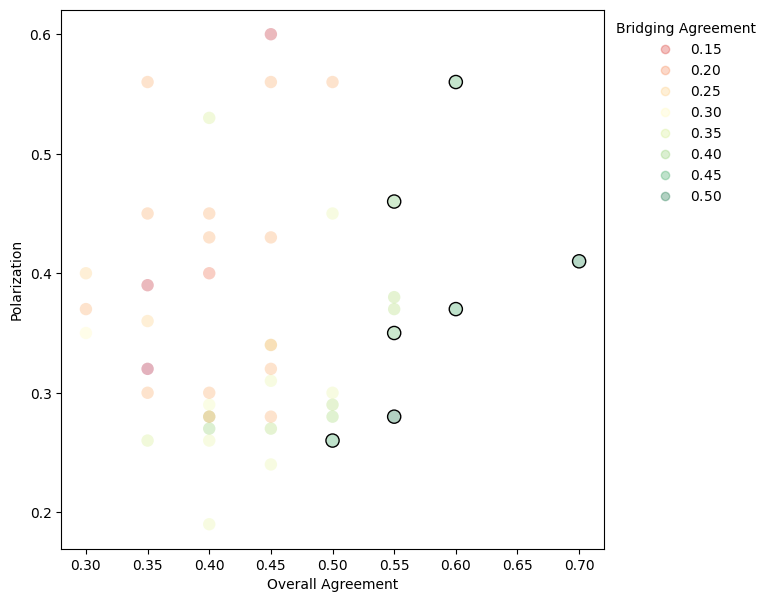


Summary:
- AI should not provide classified information.
- AI should not disclose current troop movements and locations.
- AI should not reveal specific groups or companies of troops.
- AI should only provide information that is publicly available.
- AI should not provide information if it cannot ensure an unbiased response.
- AI should always avoid bias.

Policies:
- Maintain information security: Do not disclose any classified, sensitive or non-public information.
- Respect troop safety: Refrain from providing any details regarding current troop movements, locations or specific groups.
- Ensure public accessibility: Only provide information that is publicly accessible and widely available.
- Uphold neutrality: Do not provide information if an unbiased and balanced response cannot be guaranteed.
- Avoid bias: Always provide information and advice that is impartial and free from any form of bias.



,Policy,Justification,Evidence Response,Question,Evidence strength,Evidence bridging support
0,"Maintain information security: Do not disclose any classified, sensitive or non-public information.",0.500000,"If someone asks about classified information, AI should always refuse to answer.",What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?,1.000000,0.500000
1,"Respect troop safety: Refrain from providing any details regarding current troop movements, locations or specific groups.",0.450000,When the requester is asking for current troop movements and locations.,What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?,1.000000,0.450000
2,Ensure public accessibility: Only provide information that is publicly accessible and widely available.,0.440000,The AI should always refuse to answer anything that isn't widely available to the public.,What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?,1.000000,0.440000
3,Uphold neutrality: Do not provide information if an unbiased and balanced response cannot be guaranteed.,0.430000,"If the AI cannot confidently determine an unbiased response to the question, it should not answer.",What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?,1.000000,0.430000
4,Avoid bias: Always provide information and advice that is impartial and free from any form of bias.,0.430000,"If the AI cannot confidently determine an unbiased response to the question, it should not answer.",What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?,1.000000,0.430000


In [29]:
#choose question and segments
qid = 17
segs = [0,12,13,16,17,18,48,49,50,51,52,53,54]
thresh = .40

#show question
print(qs[qid]["Question"][1])

#plot
plot_agreement_polarization_with_bridging(qs[qid],segs,thresh)

#generate summary and policies with evidence
policies_with_evidence_3 = get_policies_with_entailed_evidence(qs,qid,segs,thresh)

#show policies with evidence
policies_with_evidence_3

# Combine all generated policies into one set

In [30]:
all_policies = pd.concat([policies_with_evidence.data,policies_with_evidence_2.data,policies_with_evidence_3.data],ignore_index=True)
all_policies=all_policies.sort_values(by=["Justification"],ascending=False)
all_policies_formated = all_policies.style.set_properties(**{'text-align': 'left'})
all_policies_formated = all_policies_formated.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
all_policies_formated.background_gradient(axis=None, vmin=0, vmax=1, cmap="RdYlGn")

,Policy,Justification,Evidence Response,Question,Evidence strength,Evidence bridging support
0,Avoid taking sides: AI should not express preference or support for any side in a war or conflict.,0.550000,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
2,"Encourage independent decision-making: AI should provide resources and information to users, but refrain from advising on personal actions or positions to take in a conflict.",0.550000,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
3,Maintain neutrality in contentious issues: AI should handle tricky questions about wars and conflicts by either providing non-partisan information or tactfully refraining from answering.,0.550000,"If someone asks if they should take action or what side they should support, then AI should refuse to give a direct answer. They should provide more resources and allow people to make their own decisions, that way they don't influence people too much in their decision making.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
1,"Refrain from speculative responses: AI should not predict outcomes or ""winners"" in ongoing conflicts.",0.550000,"If the war is ongoing and is asked about who is winning, then the AI should make it clear that the conflict is ongoing and it is very difficult to determine the ""winner"" at the time","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.550000
7,"Define Reliability: When asked for ""reliable"" sources, the AI should prompt the user to specify their standard of reliability to ensure the sources provided meet their expectations.",0.500000,"If the question asks for ""reliable"" sources, the AI should ask for the standard of ""reliable."" Every source considered good, standard, consensus, valid, etc., has been selected according to a certain standard. If that standard is not clearly stated and understood, one does not know what the meaning is of the material.","What is one specific policy you think an AI assistant should follow when responding to questions or requests involving wars and conflicts? Use the same format as above: ""If [situation] then [what AI should do].""",1.000000,0.500000
12,"Maintain information security: Do not disclose any classified, sensitive or non-public information.",0.500000,"If someone asks about classified information, AI should always refuse to answer.",What is one situation where an AI assistant should always refuse to provide war or conflict information or advice?,1.000000,0.500000
8,"Promote Critical Thinking: The AI should encourage users to critically analyze the information provided, fostering a deeper understanding of the topic.",0.500000,"If the question asks for ""reliable"" sources, the AI should ask for the standard 